In [56]:
%matplotlib inline 
#from __future__ import division
import __future__
import warnings
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures

In [42]:
dt = io.imread('http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot00.jpg', as_gray=True)
#dt.shape
#tmp = hsv2gray(dt)
type(dt)

numpy.ndarray

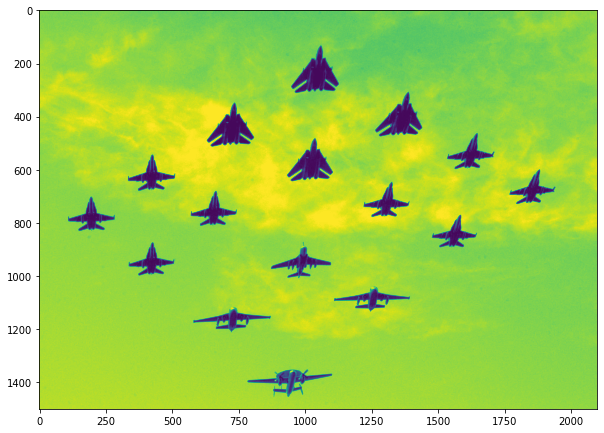

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(dt)

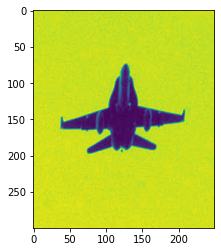

In [79]:
plane = dt[800:1100,300:550]
plt.imshow(plane)

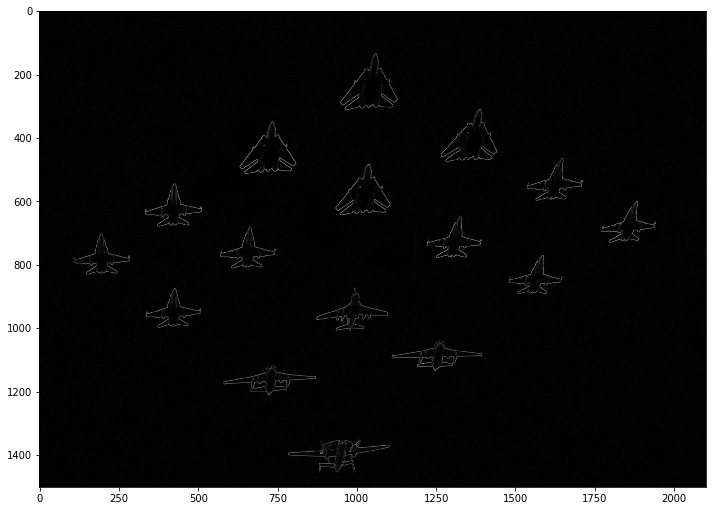

In [4]:
from skimage.filters.edges import convolve
Kh = array([[ 1, 2, 1],
            [ 0, 0, 0],
            [-1,-2,-1]]) 
Kh = Kh / 4

Kv = array([[ 1, 0,-1],
            [ 2, 0,-2],
            [ 1, 0,-1]])
Kv = Kv / 4


hor = np.abs(convolve(dt, Kh))
ver = np.abs(convolve(dt, Kv))
#res = np.sqrt(hor**2 + ver**2)

#res = np.sqrt(hor*0.5 + ver*0.5)
res = (hor+ver)/2
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
io.imshow(res)

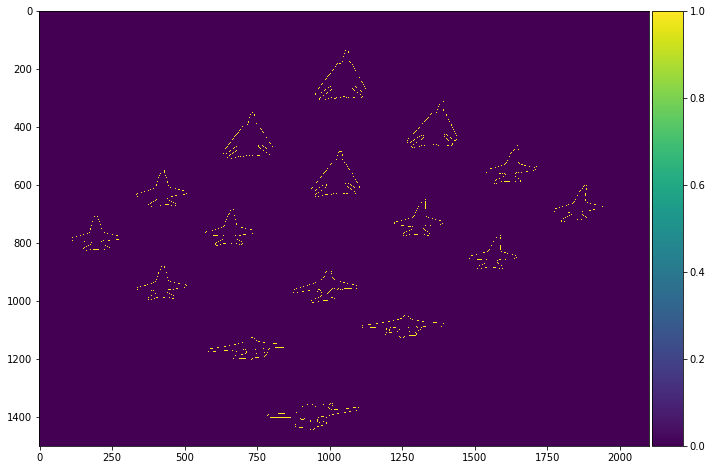

In [41]:
from skimage.feature import canny
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
czar = canny(dt, sigma=5)
io.imshow(czar)

In [24]:
fig.savefig('samoloty.pdf')

C:\Users\weron\Miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


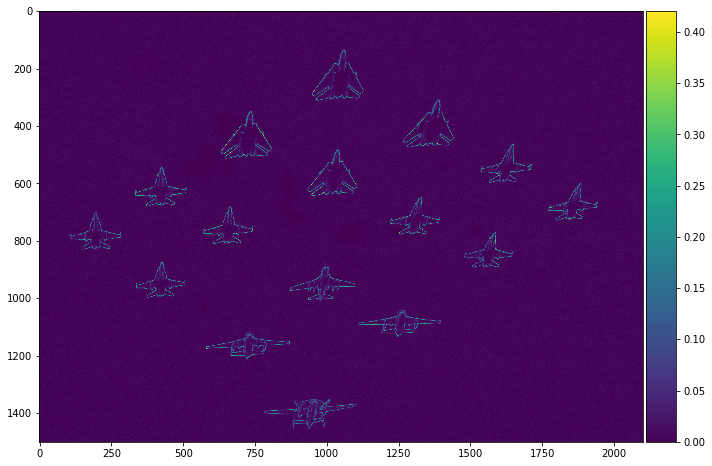

In [18]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
img = mp.dilation(mp.erosion(czar))
img = mp.erosion(img)
io.imshow(img)

In [8]:
img

array([[0.00196078, 0.00196078, 0.00196078, ..., 0.00443451, 0.00742647,
        0.00742647],
       [0.00196078, 0.00196078, 0.00392157, ..., 0.00675637, 0.01191745,
        0.00742647],
       [0.00196078, 0.00196078, 0.00392157, ..., 0.00724941, 0.01177039,
        0.01079   ],
       ...,
       [0.00476235, 0.00224353, 0.00167804, ..., 0.00575804, 0.01568627,
        0.01258667],
       [0.00476235, 0.00224353, 0.00224353, ..., 0.00698706, 0.01470588,
        0.01372549],
       [0.00476235, 0.00224353, 0.00224353, ..., 0.01470588, 0.01372549,
        0.01372549]])

In [9]:
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        if img[r, c] < 0.12:
            img[r, c] = 0
        else:
            img[r, c] = 1

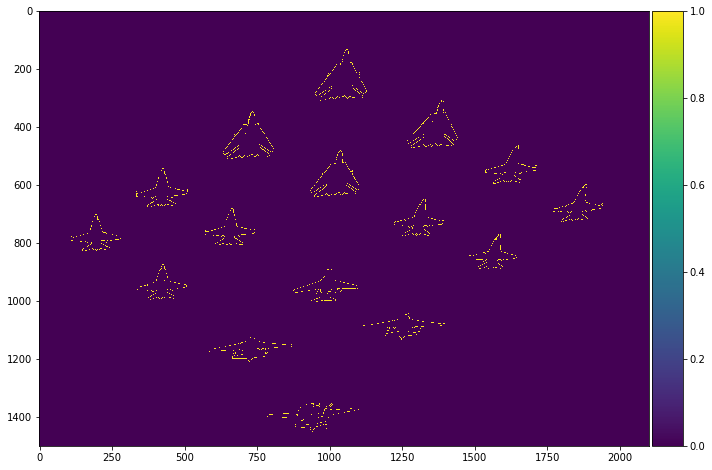

In [10]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
io.imshow(img)

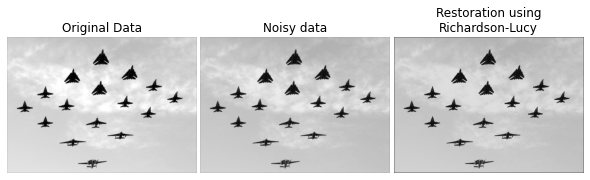

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

#astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = conv2(dt, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

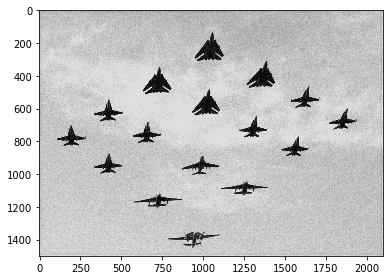

In [44]:
io.imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())

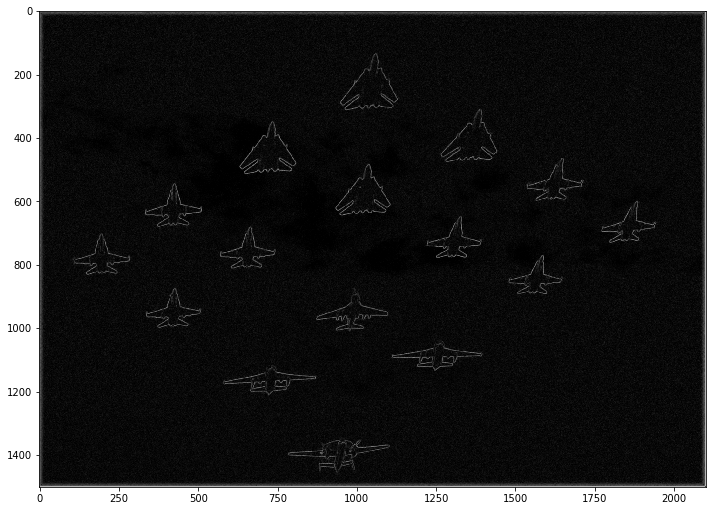

In [49]:
from skimage.feature import canny
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
czar = filters.sobel(deconvolved_RL)
io.imshow(czar)

In [50]:
fig.savefig('samoloty_1.pdf')

In [51]:
dt = io.imread('http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot00.jpg', as_gray=True)
#dt.shape
#tmp = hsv2gray(dt)
type(dt)

numpy.ndarray

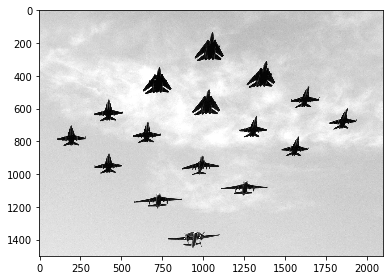

In [52]:
io.imshow(dt, cmap=plt.cm.gray)

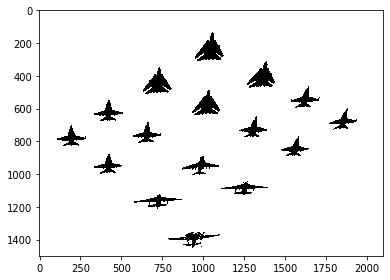

In [63]:
bw = filters.threshold_minimum(dt)
bw = dt > bw
io.imshow(bw, cmap=plt.cm.gray)

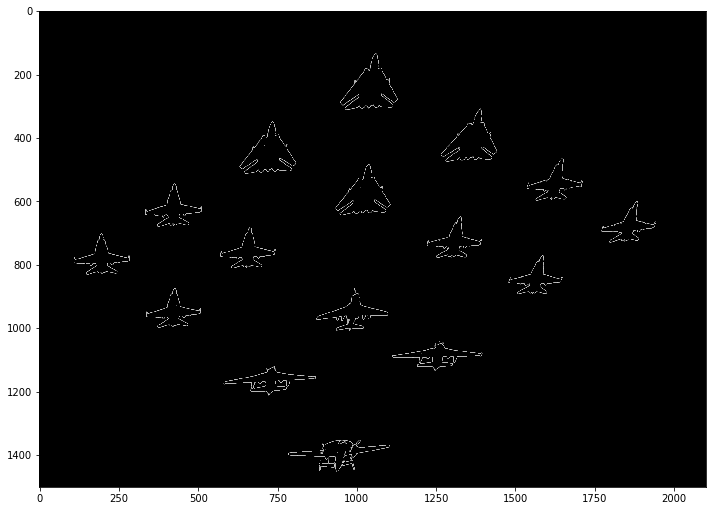

In [69]:
from skimage.feature import canny
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
czar = filters.sobel(bw)
io.imshow(czar)

In [70]:
fig.savefig('samoloty_2.pdf')

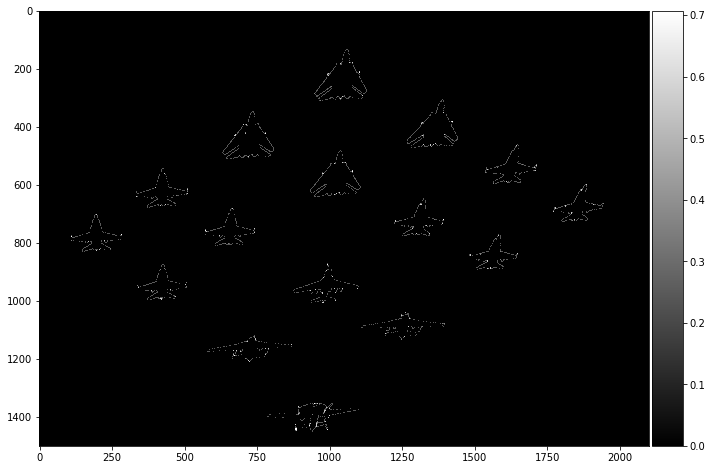

In [74]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
#img = mp.dilation(mp.erosion(czar))
img = mp.dilation(img)
io.imshow(img, cmap=plt.cm.gray)